In [ ]:
# Imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold


In [ ]:
try:
    pdTest = pd.read_csv('/content/test.csv')
except:
    print("test.csv load failed")

try:
    pdTrain = pd.read_csv('/content/train.csv')
except:
    print("train.csv load failed")

try:
    pdAllData = pd.read_csv('/content/allData.csv')
except:
    print("allData.csv load failed")

test = pdTest.head(10).filter(items=['abb','bby','van','sur','rmd','bedrooms', 'bathrooms', 'lotSize', 'builtYear', 'actualValue'])
train = pdTrain.head(30).filter(items=['abb','bby','van','sur','rmd','bedrooms', 'bathrooms', 'lotSize', 'builtYear', 'actualValue'])
allData = pdAllData.head(40).filter(items=['abb','bby','van','sur','rmd','bedrooms', 'bathrooms', 'lotSize', 'builtYear', 'actualValue'])

# print(allData)


In [ ]:
# k = size of each validation set
def cross_validate(input_data, k):
    score = 0.0
    bestScore = 0.0
    # currentRegressor = RandomForestRegressor(n_estimators=300, random_state=0)
    bestRegressor = RandomForestRegressor(n_estimators=300, random_state=0)

    for i in range(int(input_data.shape[0] / k)):
        currentRegressor = RandomForestRegressor(n_estimators=300, random_state=0)
        validation_set = input_data.iloc[range(i * k, (i + 1) * k)]
        training_set = input_data.drop(input_data.index[range(i * k, (i + 1) * k)])
        x_train = training_set[rel_cols[:-1]].iloc[:, 0:].values
        y_train = training_set.iloc[:, -1].values
        x_test = validation_set[rel_cols[:-1]].iloc[:, 0:].values
        y_test = validation_set.iloc[:, -1].values

        currentRegressor.fit(x_train, y_train)

        # print(x_test)
        # print(y_test)

        score = scoreRegressor(currentRegressor, x_test, y_test, k, input_data)

        if(score > bestScore):
          bestScore = score
          bestRegressor = currentRegressor
    return bestRegressor, bestScore    
    
def scoreRegressor(regressor, xtest, ytest, k, data):
    this_score = regressor.score(xtest, ytest)
    # print("The score is: " + str(this_score))
    return this_score


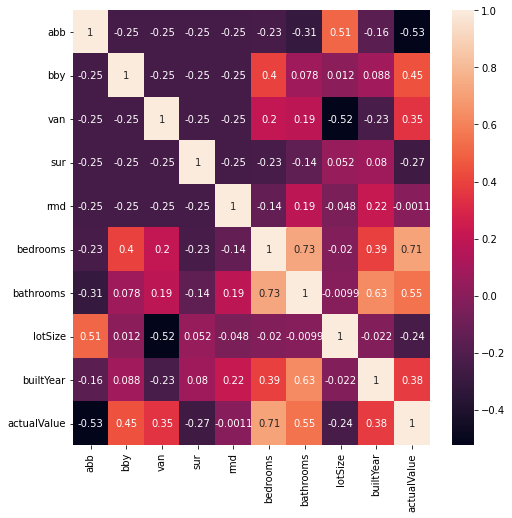

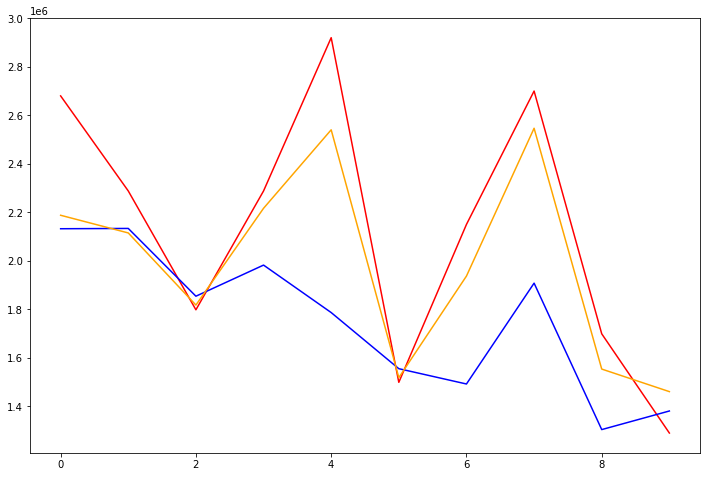

In [ ]:
# from competition
# https://www.kaggle.com/code/thierryherrie/house-prices-random-forest/notebook

corr = train.corr()
rel_vars = corr.actualValue[corr.actualValue > -1]
rel_cols = list(rel_vars.index.values)

corr2 = train[rel_cols].corr()
plt.figure(figsize=(8, 8))
hm = sns.heatmap(corr2, annot=True, annot_kws={'size': 10})
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)

X_train = train[rel_cols[:-1]].iloc[:, 0:].values
y_train = train.iloc[:, -1].values

X_test = test[rel_cols[:-1]].iloc[:, 0:].values
y_test = test.iloc[:, -1].values

regressor = RandomForestRegressor(n_estimators=300, random_state=0)

# Fit Random Forest on Training Set
regressor.fit(X_train, y_train)

# KFold
n = 5  # <- the 5 here is the number of iterations we want
k = int(allData.shape[0] / n)

KFitRegressor, score = cross_validate(allData, k)

y_predBeforeReFit = KFitRegressor.predict(X_test)

# print("The score for n = " + str(n) + " is " + str(score))

# Score model
# regressor.score(X_train, y_train)

y_pred = regressor.predict(X_test)

# print("\n\ny_pred")
# print(y_pred)
# print("\n\ny_actual")
# print(y_test)

# Plot y_test vs y_pred
plt.figure(figsize=(12,8))
plt.plot(y_test, color='red')
plt.plot(y_pred, color='blue')
plt.plot(y_predBeforeReFit, color='orange')
plt.show()